# Import Libraries

In [1]:
#Import libraries
!pip install wordcloud
import pandas as pd
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/priyankamoree/Encryptix-Internship-Tasks/main/Datasets%20For%20Internship%20Tasks/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Verify the columns
print(df.columns)

Index(['v1', 'v2'], dtype='object')


In [7]:
#rename columns for better readability.
df.columns = ['label', 'message']

# Verify the column names
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


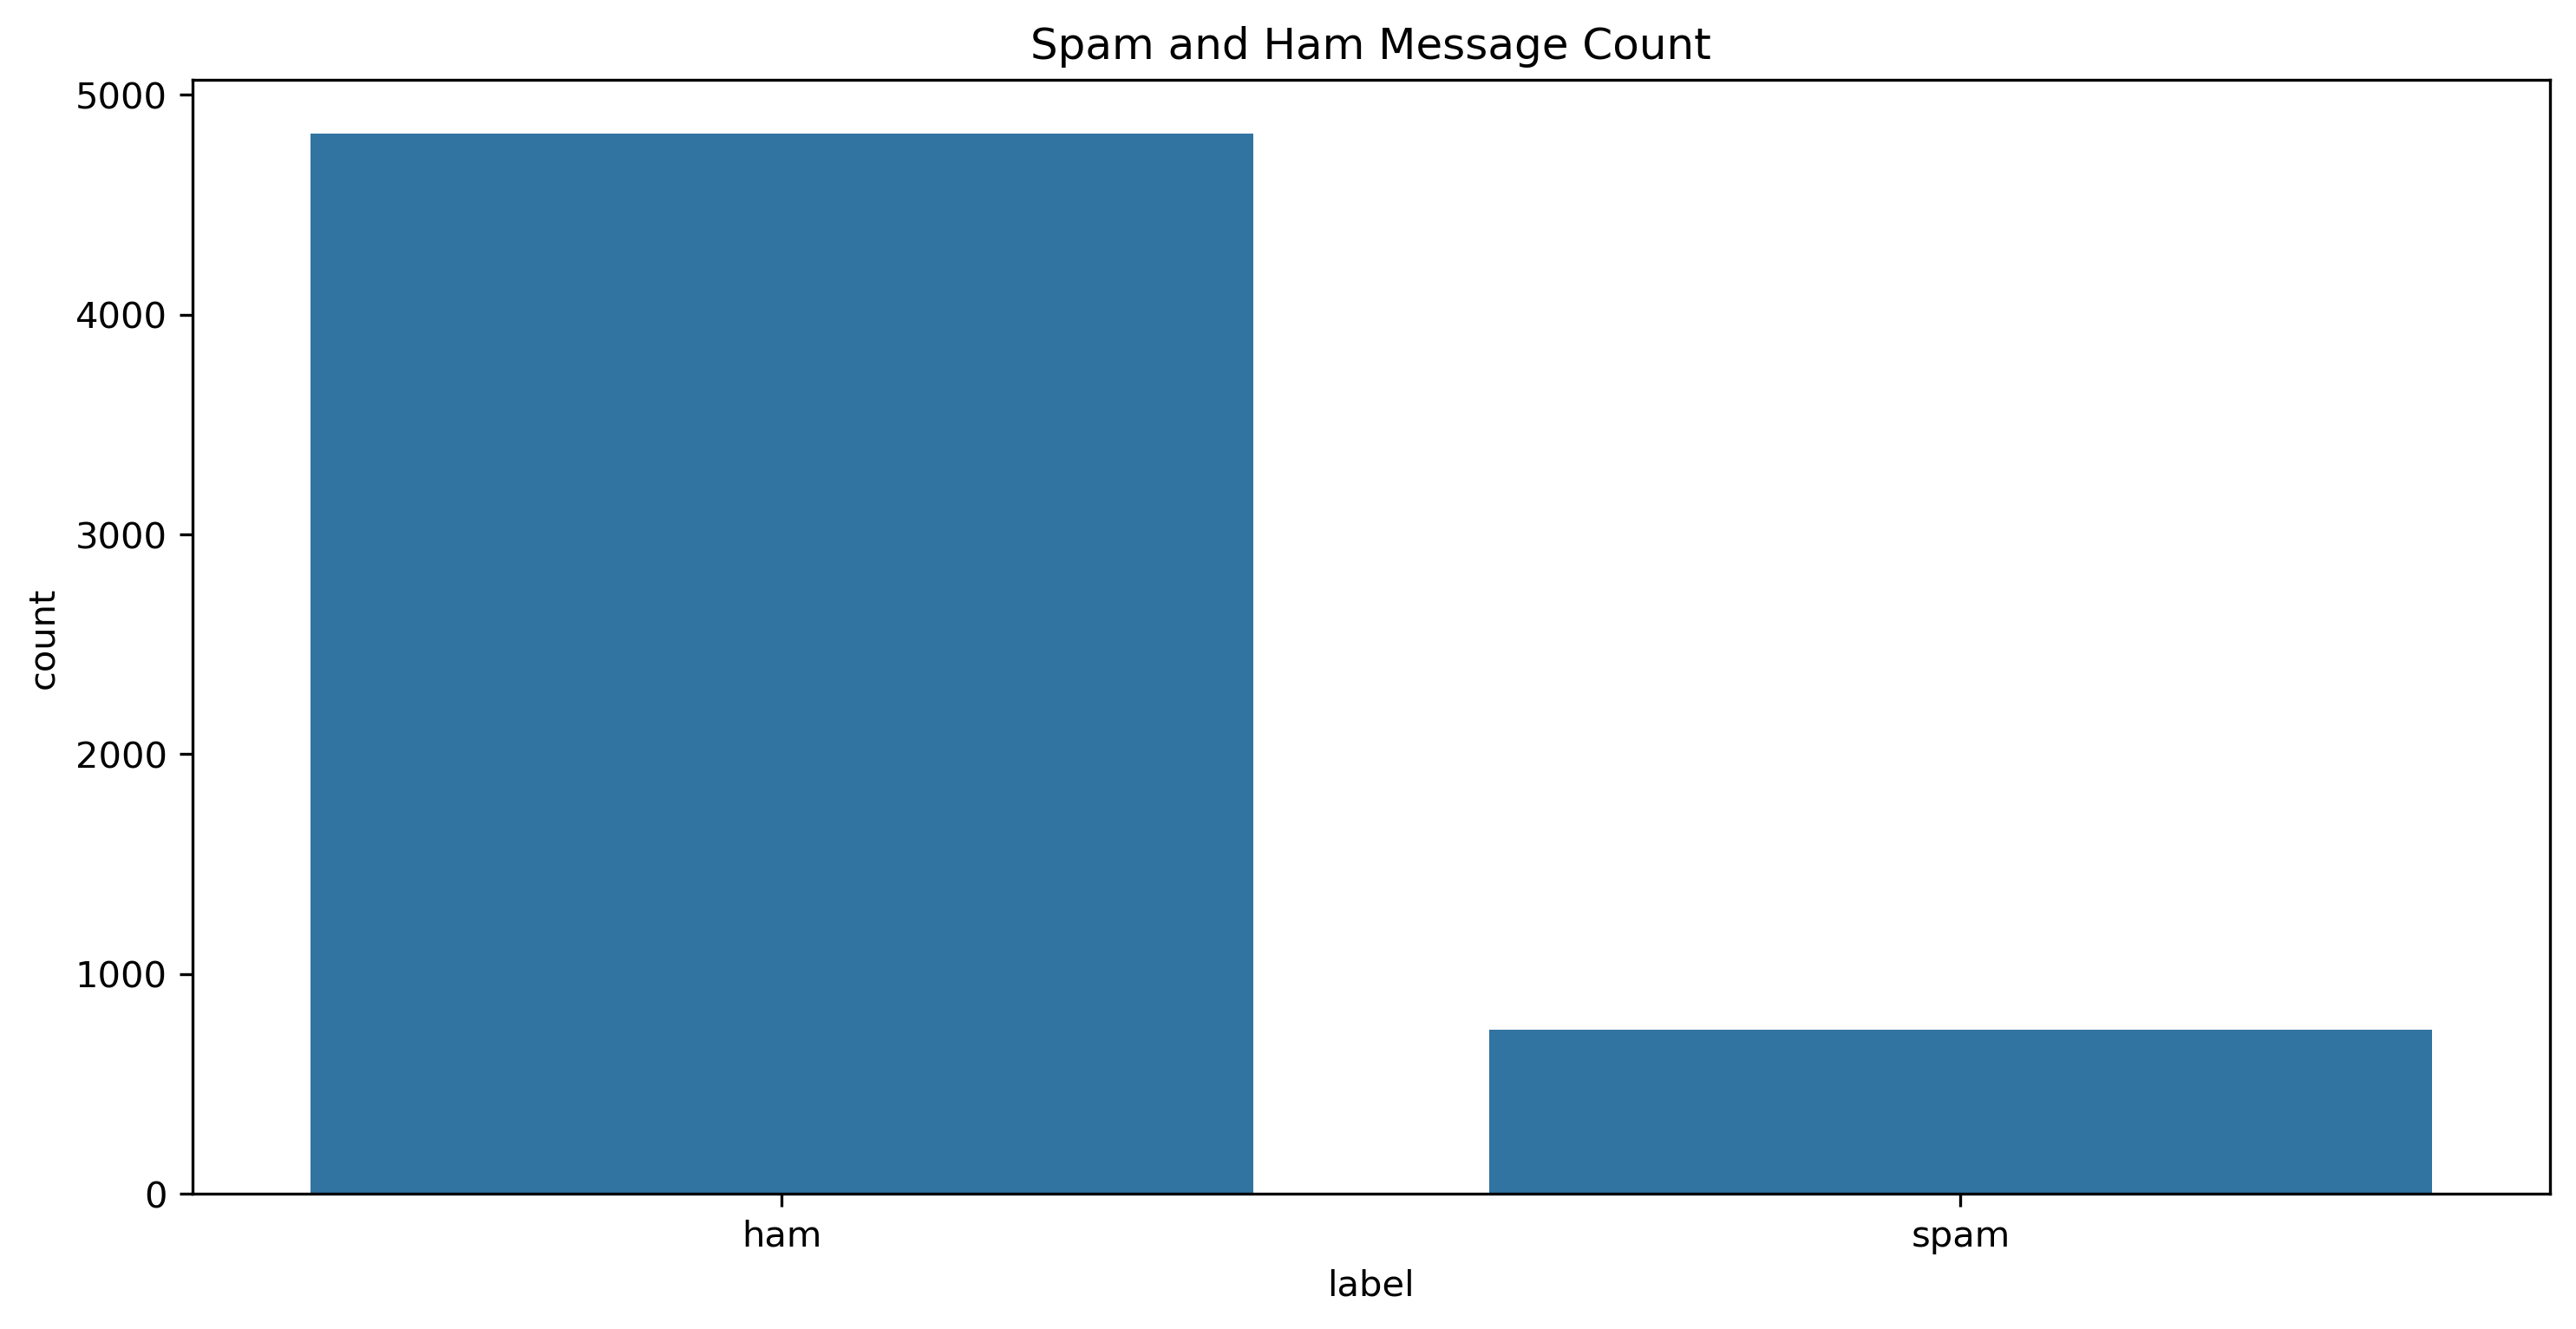

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['label'])
plt.tight_layout()
plt.title("Spam and Ham Message Count")
plt.show()

In [24]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
# Convert labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [31]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Text Cleaning

In [29]:
lemma = WordNetLemmatizer()
corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['message'][i]) #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split() #Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

In [30]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

# Model Building

# TD-IDF

In [34]:
y=df['label']

In [35]:
tf = TfidfVectorizer()

x_data = tf.fit_transform(corpus)
x_data = x_data.toarray()
x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x_data,y,test_size=0.2, random_state=1)

In [37]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

print(f"Train Accuracy: {nb.score(xtrain,ytrain)}\nTest Accuracy: {nb.score(xtest,ytest)}")

Train Accuracy: 0.9771146511106125
Test Accuracy: 0.9775784753363229
